# Assignment 1: PyTorch Basics

## Overview

In this assignment, you will:
1. Build a simple neural network from scratch to understand how neural networks work.
2. Train a neural network (using PyTorch) to classify images from the Mechanical Tools Classification dataset into one of 8 classes (hammer, wrench, pliers, etc.).

The provided code will guide you through key steps, but by the end of the assignment, you should:

1. Understand the training loop for a machine learning model.
2. Distinguish between training, validation, and test data.
3. Learn about overfitting and underfitting.
4. Explore how hyperparameters, like learning rate and batch size, impact training.
5. Compare a basic feedforward neural network (ANN) with a convolutional neural network (CNN).

This assignment is inspired by materials developed by Prof. Lisa Zhang.


## What to Submit

1. Submit the `.ipynb` and `.html` files containing your code, outputs, and answers from all parts. Please take extra effort to make your answers and submissions readable. Do not display unnecessary outputs, only the ones that are important for supporting your answers.

  You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.


2. Submit your model predictions on the secret test dataset for Parts B-5 and B-6 as `labels_part5.csv` and `labels_part6.csv`.

**Important**: Do not submit additional files generated by your code.

Please use Google Colab for this assignment. If you prefer Jupyter Notebook, ensure the file is uploaded to Colab for submission.


## Colab Link

Include a link to your colab file here and ensure the file can be accessed by the our teaching team.

Colab Link:

In [ ]:
# TO BE COMPLETED

# https://colab.research.google.com/drive/1Eh9BnGAn5_k4aXe_Y882g5OIhIZVWbaa?usp=sharing

# PART A: Building a Neural Network from Scratch [8pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:


In [ ]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

Saving mechanical_tools.zip to mechanical_tools.zip
Saving Iris_3class.csv to Iris_3class.csv


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data = raw_data.values
np.random.shuffle(raw_data)

In [ ]:
import numpy as np

# split your data into training and validation
X_train = raw_data[0:100,:4]
y_train = raw_data[0:100,4:5].astype(int)
X_val = raw_data[100:,:4]
y_val = raw_data[100:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 1)
float64 int64
(50, 4) (50, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [ ]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

y_val = to_one_hot(y_val)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(100, 4) (100, 3)
float64 float64
(50, 4) (50, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

## Part A-1. Develop a 2-layer ANN [6pt MODEL]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [ ]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#define softmax
def softmax(x):
  e = np.exp(x)
  return e/e.sum(axis=1, keepdims = True)


def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)

  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1)

  # softmax
  y_pred = softmax(layer2)

  #Back propagation using gradient descent

  #cross-entropy loss
  m = y_train.shape[0]
  log_likelihood = -np.sum(y_train * np.log(y_pred))
  error = log_likelihood / m

  #initialize gradients to zero
  dw0 = np.zeros_like(w0)
  dw1 = np.zeros_like(w1)

  #calculate gradients
  dZ2 = y_pred - y_train
  dZ1 = np.dot(dZ2, w1.T) * layer1 * (1 - layer1)

  #determine gradients
  dw1 = np.dot(layer1.T, dZ2) / m
  dw0 = np.dot(layer0.T, dZ1) / m

  #combine gradients into one vector
  dW = np.concatenate((dw0.flatten(), dw1.flatten()))

  return (error, dW, y_pred)


## Part A-2. Train your neural network [1pt RESULT]
How well does your network work on the iris dataset?

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#train network
n = 0.001
iterations = 100000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW * n
  errors.append(error)


In [ ]:
#examine predictions on training data
(_, _, y_pred) = ann(W, X_train, y_train)
pred = np.round(y_pred, 0)
pred[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
#examine ground truth training data
train = np.round(y_train, 0)
train[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

'''
# Calculate accuracy as the percentage of matches
accuracy = np.mean(pred == train) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 99.00%


The network performs perfectly on the training data for the first five samples, as predictions match the ground truth exactly. I also check the overall training accuracy is 99%, which suggests strong learning on the training set but does not guarantee generalization to unseen data.

## Part A-3. Validation [2pt MODEL]
Validate that the gradients were computed correctly for the 2-layer neural network you developed.

In [ ]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3

#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.concatenate((w0.flatten(), w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))

  #increment slightly
  We1[ind] = We1[ind] + 1e-9
  We2[ind] = We2[ind] - 1e-9

  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)

  #obtain numerical gradients
  grad_num = (error_e1 - error_e2) / (2 * 1e-9)

  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.0 0.01359545809265228 0.013595431398061323
0.0 0.045363601763881434 0.045363701040749424
0.0 0.007968181670037211 0.007968283809939379
0.0 0.19274093432386508 0.1927409197163643
0.0 0.007554068481852027 0.007554170510277494
0.0 0.009388489985440174 0.009388512404157444
0.0 0.03238354029377888 0.03238356969566905
0.0 0.01662647797218142 0.016626401015278985
0.0 0.09094613950821895 0.0909459869252364
0.0 0.0010251799409388695 0.001025247189133686
0.0 0.003871014619960533 0.0038711899971283848
0.0 0.012903567103705882 0.012903494378118295
0.0 -0.018688051106607872 -0.018687900248252398
0.0 0.16252421630724712 0.1625241543077717
0.0 0.012236545110511088 0.012236566711058211
0.0 0.0007185363415374013 0.0007184728418104023
0.0 0.003354205801997523 0.0033541940386375324
0.0 -0.007424505454878271 -0.007424610502226926
0.0 0.06212563796736958 0.06212566651267788
0.0 0.005137668068755374 0.005137579872299477
0.0 0.017269297103439385 0.017269282361401506
0.0 0.25323021457523964 0.25323020359609

# PART B: Training with PyTorch

In the second part of the assignment we will see how we can use PyTorch to train a neural network to identify different Mechanical Tools.


In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

## Part B-0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [ ]:
###############################################################################
# Data Loading

def get_data_loader(data_dir, batch_size, valid_split=0.2):
    """
    Load the Mechanical Tools Dataset, split into training, validation, and testing.

    Args:
        data_dir: The root directory of the dataset, with subdirectories for each class.
        batch_size: Number of samples per batch.
        valid_split: Fraction of the training data to be used for validation.

    Returns:
        train_loader: Iterable DataLoader for training data.
        val_loader: Iterable DataLoader for validation data.
        test_loader: Iterable DataLoader for testing data.
        classes: List of class names.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the full dataset
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    classes = dataset.classes  # Get class names

    # Split the dataset
    total_size = len(dataset)
    test_size = int(0.1 * total_size)  # 10% for testing
    valid_size = int(valid_split * (total_size - test_size))  # Valid from remaining
    train_size = total_size - test_size - valid_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Normalize labels for multi-class classification.

    Args:
        labels: A 1D tensor of scalar class labels.
    Returns:
        The same labels (already suitable for multi-class classification).
    """
    return labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on a given dataset.

     Args:
         net: PyTorch neural network object.
         loader: PyTorch DataLoader for valuation data.
         criterion: The loss function.

     Returns:
         err: Average classification error rate over the validation set.
         loss: Average loss value over the validation set.
    """
    total_loss = 0.0
    total_err = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in loader:
            outputs = net(inputs)

            # Compute loss
            loss = criterion(outputs, labels)

            # Compute classification error
            _, predicted = torch.max(outputs, 1)
            total_err += (predicted != labels).sum().item()
            total_loss += loss.item()
            total_samples += len(labels)

    err = total_err / total_samples
    avg_loss = total_loss / len(loader)
    return err, avg_loss

###############################################################################
# Training Curve

def plot_training_curve(path):
    """ Plot training and validation error/loss curves.

    Args:
        path: Base path for the CSV files containing training logs.
    """
    import matplotlib.pyplot as plt

    train_err = np.loadtxt(f"{path}_train_err.csv")
    val_err = np.loadtxt(f"{path}_val_err.csv")
    train_loss = np.loadtxt(f"{path}_train_loss.csv")
    val_loss = np.loadtxt(f"{path}_val_loss.csv")

    plt.figure()
    plt.title("Train vs Validation Error")
    plt.plot(range(1, len(train_err) + 1), train_err, label="Train")
    plt.plot(range(1, len(val_err) + 1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()

    plt.figure()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1, len(train_loss) + 1), train_loss, label="Train")
    plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()


## Part B-1. Visualizing the Data

We will make use of the Mechanical Tools dataset, which consists of
color images of various mechanical tools such as hammers, wrenches,
screwdrivers, and more. These images are resized to 128x128 pixels.
You can find the dataset at https://www.kaggle.com/datasets/salmaneunus/mechanical-tools-dataset

Download the "mechanical_tools.zip" file from Quercus and upload it to your colab session storage.
Run the provided code to automatically unzip the dataset  and split the dataset into
training, validation, and testing sets.

In [ ]:
_ = !unzip "/content/mechanical_tools.zip" -d "/content/mechanical_tools/"

In [ ]:
# Load the Mechanical Tools Dataset
data_dir = "./mechanical_tools/mechanical_tools"  # Path to the dataset directory
batch_size = 1  # One image per batch for visualization

# Use the get_data_loader function to load the dataset
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir, batch_size=batch_size
)

### Part B-1(i) [0.5pt EXPLORATORY]

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

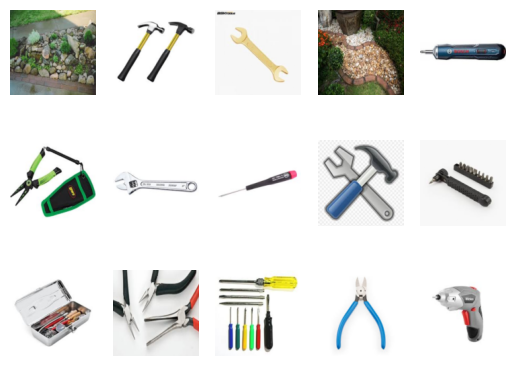

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 14:
        break

'''

PROVIDE YOUR ANSWER BELOW

'''

The image above shows examples of the mechanical tools present in the dataset. These include color images of tools like hammers, pliers, wrenches, and screwdrivers, as well as other related items such as rocks.


### Part B-1(ii) [1pt EXPLORATORY]

How many training examples do we have for the combined classes?
What about validation examples?
What about test examples?

In [ ]:
# Count the number of examples in each dataset split
def count_examples(data_loader):
    count = 0
    for _ in data_loader:
        count += 1
    return count

# Get the counts for training, validation, and test datasets
num_train_examples = count_examples(train_loader)
num_val_examples = count_examples(val_loader)
num_test_examples = count_examples(test_loader)

# Print the results
print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_val_examples}")
print(f"Number of test examples: {num_test_examples}")

Number of training examples: 1152
Number of validation examples: 288
Number of test examples: 160


'''

PROVIDE YOUR ANSWER BELOW

'''

The dataset includes 1,152 training examples, 288 validation examples, and 160 test examples.

## Part B-2. Training

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 29 * 29, 32)
        self.fc2 = nn.Linear(32, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 29 * 29)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 31 * 31, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 31 * 31)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
small_net = SmallNet()
large_net = LargeNet()

### Part B-2(i) [1pt EXPLORATORY]

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values.

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

In [ ]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([8, 4805])
torch.Size([8])


In [ ]:
def count_parameters(model):
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()  # numel() gives the total number of elements in the tensor
    return total_params

small_net_params = count_parameters(small_net)
large_net_params = count_parameters(large_net)

# Print the results
print(f"Total number of parameters in small_net: {small_net_params}")
print(f"Total number of parameters in large_net: {large_net_params}")


Total number of parameters in small_net: 38588
Total number of parameters in large_net: 271056


'''

PROVIDE YOUR ANSWER BELOW

'''

The total number of parameters in small_net is 38,588, and in large_net, it is 271,056. These parameters are calculated by summing the elements in all trainable tensors, including the weights and biases for each layer. The size of each tensor depends on the layer's dimensions. The larger number of parameters in large_net reflects its more complex architecture compared to small_net.


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on an 8-class classification problem
    target_classes = ["Gasoline_Can", "Hammer", "Pebbels", "pliers",
                      "Rope", "Screw_Driver", "Toolbox", "Wrench"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible results
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            data_dir='/content/mechanical_tools/mechanical_tools', # Ensure this is where your dataset is stored
            batch_size=batch_size)

    # Make sure the classes are as expected
    assert len(classes) == 8, "The dataset should have exactly 8 classes."
    ########################################################################
    # Define the Loss function and optimizer
    # Use CrossEntropyLoss for multi-class classification
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)  # No need to normalize labels here for CrossEntropyLoss
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total_train_err += (predicted != labels).sum().item()  # Count errors
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # Calculate error and loss for the training and validation set
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        # Print stats for the current epoch
        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Write the train/test loss/error into CSV files for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)


### Part B-2(ii) [0.5pt EXPLORATORY]

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on.

What are the default values of the parameters `batch_size`, `learning_rate`,
and `num_epochs`?

'''

PROVIDE YOUR ANSWER BELOW

'''

The default values for the parameters are:
batch_size = 64,
learning_rate = 0.01,
num_epochs = 30.

### Part B-2(iii) [0.5pt EXPLORATORY]
What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

'''

PROVIDE YOUR ANSWER BELOW

'''

current model checkpoints:

small_bs64_lr0.01_epoch0.model,
small_bs64_lr0.01_epoch1.model,
small_bs64_lr0.01_epoch2.model,
small_bs64_lr0.01_epoch3.model,
small_bs64_lr0.01_epoch4.model.
These files contain the saved weights and biases (model parameters) of small_net after each epoch. Each file corresponds to the model state at the end of a specific epoch.


train/test loss/error into CSV files:

small_bs64_lr0.01_epoch4_train_err.csv,
small_bs64_lr0.01_epoch4_train_loss.csv,
small_bs64_lr0.01_epoch4_val_err.csv,
small_bs64_lr0.01_epoch4_val_loss.csv.
The CSV files store training and validation statistics, which can be used for plotting learning curves to analyze the model's performance over epochs.


### Part B-2(iv) [0.5pt EXPLORATORY]
Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights)
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive
so that the files generated by `train_net` gets saved. We will be using
these files in the parts that follow.
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the assignment locally, you
# can comment out this code.

# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# default parameters: batch_size=64, learning_rate=0.01, num_epochs=30

# Train small_net and record time
print("Training small_net...")
train_net(small_net)

# Train large_net and record time
print("Training large_net...")
train_net(large_net)

Training small_net...
Epoch 1: Train err: 0.7413, Train loss: 1.8912 | Validation err: 0.6875, Validation loss: 1.7803
Epoch 2: Train err: 0.5660, Train loss: 1.5339 | Validation err: 0.6667, Validation loss: 1.7962
Epoch 3: Train err: 0.4931, Train loss: 1.3909 | Validation err: 0.5764, Validation loss: 1.5858
Epoch 4: Train err: 0.4436, Train loss: 1.2249 | Validation err: 0.5486, Validation loss: 1.5687
Epoch 5: Train err: 0.3898, Train loss: 1.0960 | Validation err: 0.5417, Validation loss: 1.6910
Epoch 6: Train err: 0.3247, Train loss: 0.9490 | Validation err: 0.5903, Validation loss: 1.7985
Epoch 7: Train err: 0.2561, Train loss: 0.7786 | Validation err: 0.5382, Validation loss: 1.7974
Epoch 8: Train err: 0.1667, Train loss: 0.5944 | Validation err: 0.5694, Validation loss: 2.1204
Epoch 9: Train err: 0.1380, Train loss: 0.4886 | Validation err: 0.6285, Validation loss: 2.4236
Epoch 10: Train err: 0.1233, Train loss: 0.4053 | Validation err: 0.5799, Validation loss: 2.3385
Epoch 1

'''

PROVIDE YOUR ANSWER BELOW

'''

The large_net took longer to train, with a total time of 263 seconds, compared to 160 seconds for the small_net. This is because large_net has 271056 parameters, which is significantly more than small_net with 38588 parameters and a more complex architecture with deeper layers and larger feature dimensions. These factors increase the computational load during forward and backward passes, resulting in longer training time.

### Part B-2(v) [0.5pt EXPLORATORY]
Use the function `plot_training_curve` to display the trajectory of the
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

Training curve for small_net:


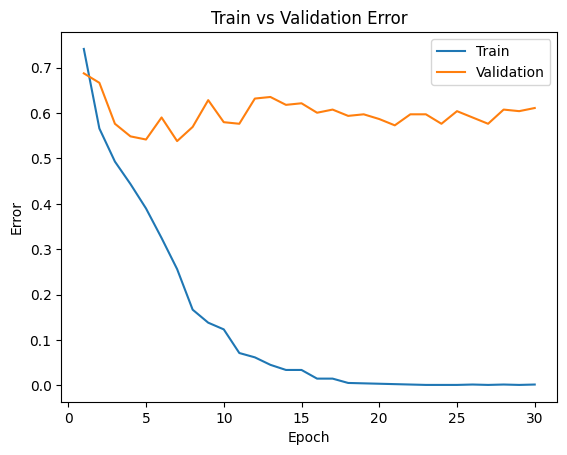

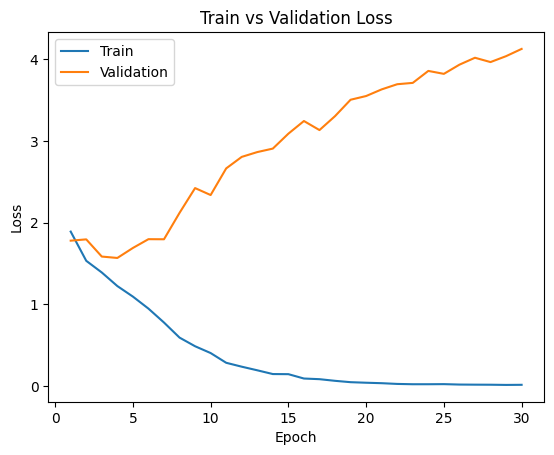

Training curve for large_net:


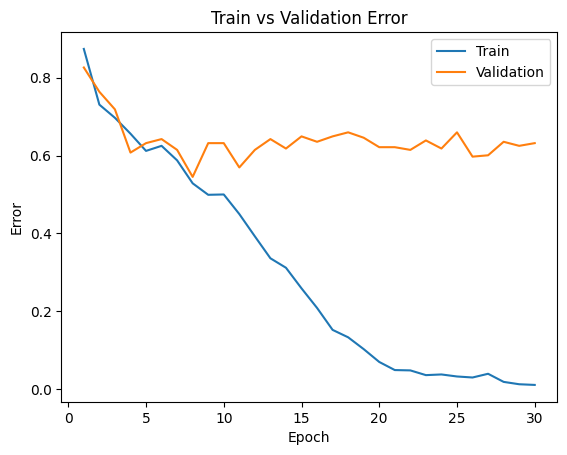

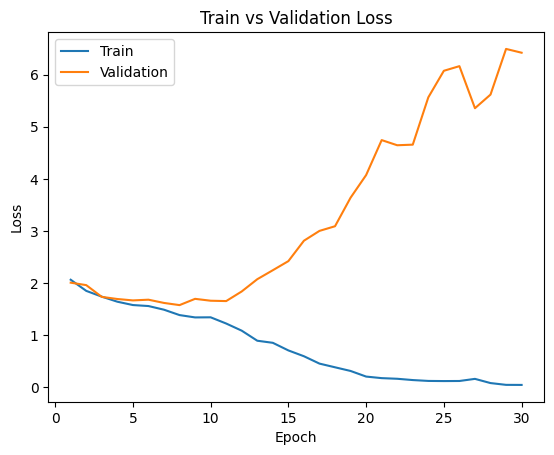

In [ ]:
model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
# Plot the training curve for small_net
print("Training curve for small_net:")
plot_training_curve(model_path)

# model path for large_net
model_path_large = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)

# Plot the training curve for large_net
print("Training curve for large_net:")
plot_training_curve(model_path_large)


'''

PROVIDE YOUR ANSWER BELOW

'''

The plot_training_curve function was used to visualize the training and validation error, as well as the loss curves, for both small_net and large_net. The get_model_name function was utilized to generate the appropriate model paths for each network. Both the error and loss plots have been included above for comparison.

### Part B-2(vi) [0.5pt EXPLORATORY]
Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

'''

PROVIDE YOUR ANSWER BELOW

'''

The small_net shows steady error reduction during training, but its validation error plateaus and slightly increases after a few epochs, indicating mild overfitting. While the training loss decreases consistently, the validation loss starts to rise gradually, further suggesting overfitting. In contrast, the large_net effectively reduces training error but exhibits fluctuating validation error that fails to improve, indicating significant overfitting. Its training loss steadily decreases, but the validation loss increases sharply after a few epochs, highlighting severe overfitting compared to the smaller network. The small_net has generally lower error rate and lower loss. Both models demonstrate the need for regularization or early stopping to mitigate overfitting.

## Part B-3. Optimization Parameters

For this section, we will work with `large_net` only.

### Part B-3(i) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

Epoch 1: Train err: 0.8663, Train loss: 2.0815 | Validation err: 0.8854, Validation loss: 2.0806
Epoch 2: Train err: 0.8646, Train loss: 2.0734 | Validation err: 0.8889, Validation loss: 2.0713
Epoch 3: Train err: 0.8585, Train loss: 2.0622 | Validation err: 0.8854, Validation loss: 2.0555
Epoch 4: Train err: 0.8542, Train loss: 2.0413 | Validation err: 0.8507, Validation loss: 2.0273
Epoch 5: Train err: 0.8351, Train loss: 2.0078 | Validation err: 0.8090, Validation loss: 1.9891
Epoch 6: Train err: 0.7899, Train loss: 1.9661 | Validation err: 0.7882, Validation loss: 1.9590
Epoch 7: Train err: 0.7491, Train loss: 1.9278 | Validation err: 0.7535, Validation loss: 1.9330
Epoch 8: Train err: 0.7370, Train loss: 1.8897 | Validation err: 0.7188, Validation loss: 1.9137
Epoch 9: Train err: 0.6884, Train loss: 1.8414 | Validation err: 0.6944, Validation loss: 1.8703
Epoch 10: Train err: 0.6450, Train loss: 1.7746 | Validation err: 0.6910, Validation loss: 1.7967
Epoch 11: Train err: 0.6189, 

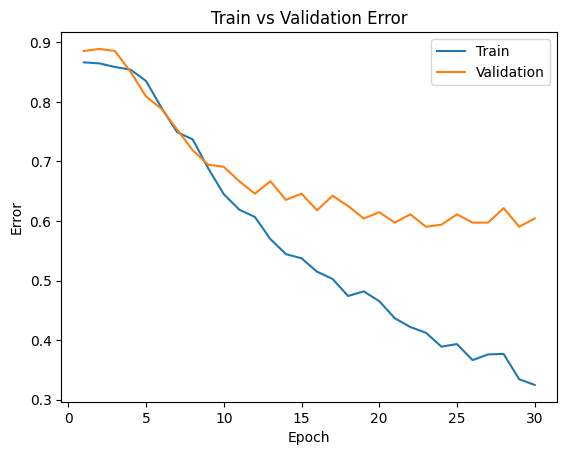

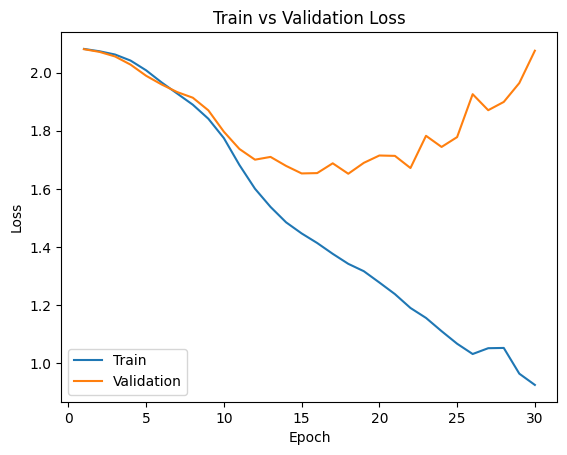

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

# Set up the learning rate and model parameters
learning_rate = 0.001
batch_size = 64
epochs = 30

train_net(large_net, batch_size=batch_size, learning_rate=learning_rate, num_epochs=epochs)
model_path_large = get_model_name("large", batch_size=batch_size, learning_rate=learning_rate, epoch=29)

# Plot the training curve for large_net
print("Training curve for large_net:")
plot_training_curve(model_path_large)

'''

PROVIDE YOUR ANSWER BELOW

'''

It takes longer to train. A smaller learning rate leads to smaller updates to the model weights, requiring more iterations to reach an optimal solution. However, it can also improve stability and avoid overshooting, potentially leading to better convergence to a minimum. The error is still slightly decreasing, shows a sign of delay convergence. The loss is lower than before in general.

### Part B-3(ii) [0.5pt EXPLORATORY]
Train `large_net` with all default parameters, except set `learning_rate=0.1`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

Epoch 1: Train err: 0.8333, Train loss: 2.0070 | Validation err: 0.8333, Validation loss: 2.0260
Epoch 2: Train err: 0.7778, Train loss: 2.4241 | Validation err: 0.8299, Validation loss: 3.3601
Epoch 3: Train err: 0.8715, Train loss: 2.1709 | Validation err: 0.8715, Validation loss: 2.0927
Epoch 4: Train err: 0.8950, Train loss: 2.0905 | Validation err: 0.8924, Validation loss: 2.0863
Epoch 5: Train err: 0.8776, Train loss: 2.0821 | Validation err: 0.8576, Validation loss: 2.0790
Epoch 6: Train err: 0.8845, Train loss: 2.0828 | Validation err: 0.8681, Validation loss: 2.0826
Epoch 7: Train err: 0.8802, Train loss: 2.0829 | Validation err: 0.8576, Validation loss: 2.0787
Epoch 8: Train err: 0.8733, Train loss: 2.0843 | Validation err: 0.8785, Validation loss: 2.0861
Epoch 9: Train err: 0.8906, Train loss: 2.0846 | Validation err: 0.8715, Validation loss: 2.0777
Epoch 10: Train err: 0.8828, Train loss: 2.0848 | Validation err: 0.8681, Validation loss: 2.0827
Epoch 11: Train err: 0.8785, 

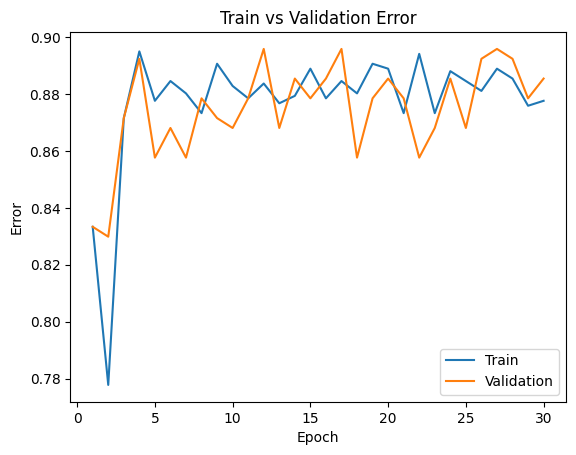

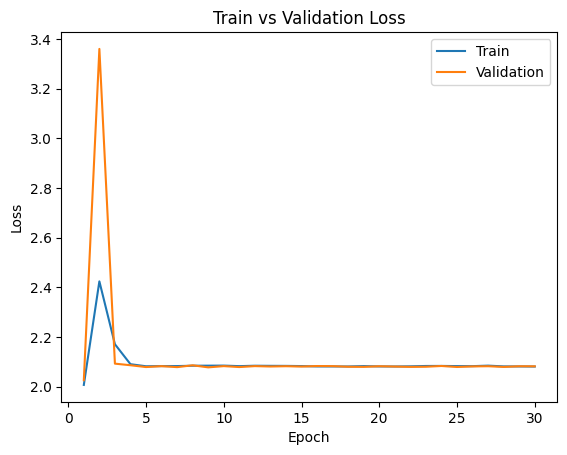

In [ ]:
large_net = LargeNet()

# Set up the learning rate and model parameters
learning_rate = 0.1
batch_size = 64
epochs = 30

train_net(large_net, batch_size=batch_size, learning_rate=learning_rate, num_epochs=epochs)
model_path_large = get_model_name("large", batch_size=batch_size, learning_rate=learning_rate, epoch=29)

# Plot the training curve for large_net
print("Training curve for large_net:")
plot_training_curve(model_path_large)

'''

PROVIDE YOUR ANSWER BELOW

'''

It takes shorter time to train. The high learning rate can cause instability in training, as the weight updates are too large, leading to oscillations around a high value rather than gradual convergence. Both the validation error and the training error flutuates in a high level for over 85% error rate, indicating that the model struggles to learn effectively with such a high learning rate and sign of underfitting. The loss curve shows a steep spike in the beginning but quickly stabilizes, which means the model is predicting probabilities confidently, even if it predicts the wrong class.

### Part B-3(iii) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

Epoch 1: Train err: 0.8594, Train loss: 2.0847 | Validation err: 0.8889, Validation loss: 2.0832
Epoch 2: Train err: 0.8655, Train loss: 2.0756 | Validation err: 0.8889, Validation loss: 2.0775
Epoch 3: Train err: 0.8533, Train loss: 2.0697 | Validation err: 0.8507, Validation loss: 2.0703
Epoch 4: Train err: 0.8307, Train loss: 2.0622 | Validation err: 0.8542, Validation loss: 2.0582
Epoch 5: Train err: 0.8273, Train loss: 2.0521 | Validation err: 0.8333, Validation loss: 2.0364
Epoch 6: Train err: 0.8194, Train loss: 2.0163 | Validation err: 0.8090, Validation loss: 2.0029
Epoch 7: Train err: 0.7969, Train loss: 1.9971 | Validation err: 0.7674, Validation loss: 1.9746
Epoch 8: Train err: 0.7682, Train loss: 1.9531 | Validation err: 0.7708, Validation loss: 1.9606
Epoch 9: Train err: 0.7613, Train loss: 1.9372 | Validation err: 0.7535, Validation loss: 1.9476
Epoch 10: Train err: 0.7214, Train loss: 1.8828 | Validation err: 0.7049, Validation loss: 1.9093
Epoch 11: Train err: 0.7040, 

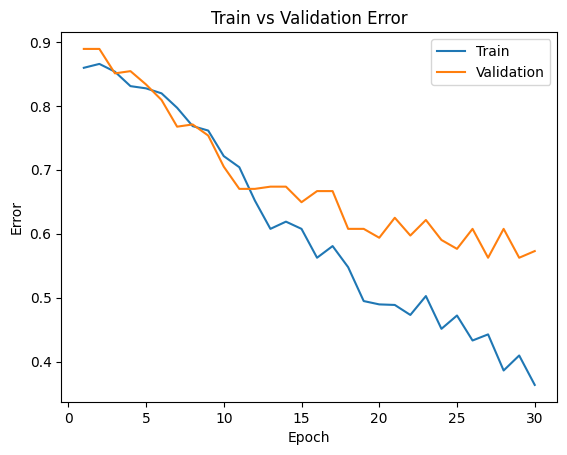

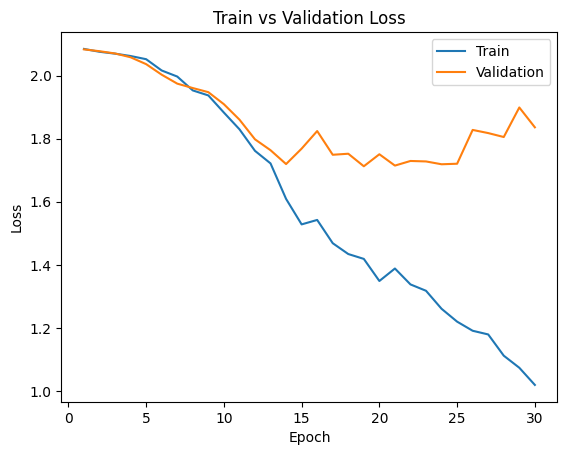

In [ ]:
large_net = LargeNet()

# Set up the learning rate and model parameters
learning_rate = 0.01
batch_size = 512
epochs = 30

train_net(large_net, batch_size=batch_size, learning_rate=learning_rate, num_epochs=epochs)
model_path_large = get_model_name("large", batch_size=batch_size, learning_rate=learning_rate, epoch=29)

# Plot the training curve for large_net
print("Training curve for large_net:")
plot_training_curve(model_path_large)

'''

PROVIDE YOUR ANSWER BELOW

'''

It takes longer time to train. When increasing the batch size to 512, the model processes more data per forward and backward pass, and each iteration may take longer due to increased computation and memory usage. Especially in Colab, Colab's virtual machines have limited CPU power and disk I/O bandwidth.
Since CPUs process data sequentially, larger batch sizes slower computation. Larger batches tend to produce smoother gradients, leading to more stable convergence, resulting in smoother training and validation curves, as the plots shows, the training error and validation error are still decreasing, so it need more epoch to converge.

### Part B-3(iv) [0.5pt EXPLORATORY]

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

Epoch 1: Train err: 0.7977, Train loss: 1.9846 | Validation err: 0.7674, Validation loss: 1.8958
Epoch 2: Train err: 0.6589, Train loss: 1.7050 | Validation err: 0.7465, Validation loss: 1.8987
Epoch 3: Train err: 0.6250, Train loss: 1.6688 | Validation err: 0.8056, Validation loss: 1.9328
Epoch 4: Train err: 0.5972, Train loss: 1.5762 | Validation err: 0.7083, Validation loss: 1.8169
Epoch 5: Train err: 0.5347, Train loss: 1.4379 | Validation err: 0.6667, Validation loss: 1.8477
Epoch 6: Train err: 0.4774, Train loss: 1.3486 | Validation err: 0.7014, Validation loss: 1.8605
Epoch 7: Train err: 0.3785, Train loss: 1.0512 | Validation err: 0.6597, Validation loss: 1.9978
Epoch 8: Train err: 0.2405, Train loss: 0.7099 | Validation err: 0.5799, Validation loss: 2.4698
Epoch 9: Train err: 0.1780, Train loss: 0.5332 | Validation err: 0.6840, Validation loss: 3.5427
Epoch 10: Train err: 0.1667, Train loss: 0.5111 | Validation err: 0.6493, Validation loss: 3.7491
Epoch 11: Train err: 0.0938, 

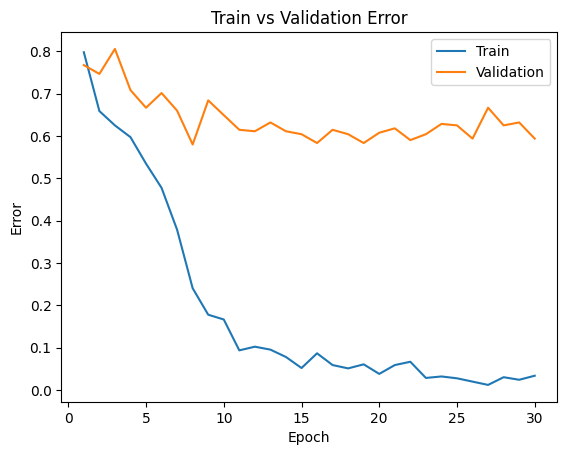

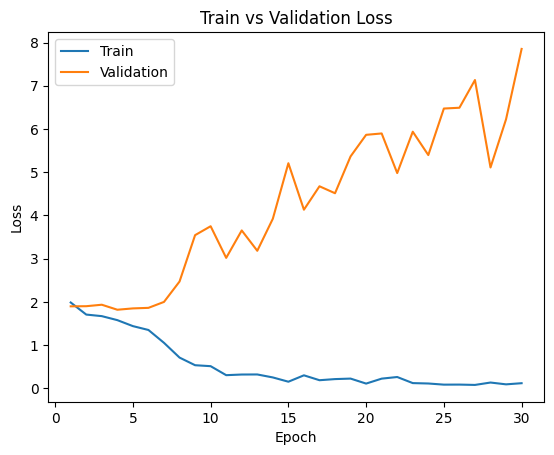

In [ ]:
large_net = LargeNet()

# Set up the learning rate and model parameters
learning_rate = 0.01
batch_size = 16
epochs = 30

train_net(large_net, batch_size=batch_size, learning_rate=learning_rate, num_epochs=epochs)
model_path_large = get_model_name("large", batch_size=batch_size, learning_rate=learning_rate, epoch=29)

# Plot the training curve for large_net
print("Training curve for large_net:")
plot_training_curve(model_path_large)


'''

PROVIDE YOUR ANSWER BELOW

'''

It takes shorter time to train but I think the difference can be negligible. Usually smaller batch sizes require more frequent updates to the model's weights, resulting in a greater number of forward and backward passes across all samples in the dataset so longer training time. This counterintuitive result is due to how the CPU processes computations and manages smaller batches in Colab. The training error decreases steadily and reaches a very low value, showing that the model fits the training data effectively. However, the validation error fluatuate in high level, indicating instability in generalization due to the smaller batch size. The validation loss increases sharply after epoch 10, which suggests overfitting because of noisier updates and more frequent iterations.

## Part B-4. Hyperparameter Search

### Part B-4(i) [1pt EXPLORATORY]

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

'''

PROVIDE YOUR ANSWER BELOW

'''

I would choose SmallNet, batch_size 64 and learning rate 0.005. A smaller network tend to have lower training time and less sign of overfitting. The choice of batch size 64 provides a good balance between gradient noise for generalization and computational efficiency. A lower learning rate than 0.01 ensures that weight updates are more controlled, reducing the risk of overshooting optimal weights.

### Part B-4(ii) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(i), and include the training curve.

Epoch 1: Train err: 0.7413, Train loss: 1.8900 | Validation err: 0.6840, Validation loss: 1.7631
Epoch 2: Train err: 0.6120, Train loss: 1.5811 | Validation err: 0.6632, Validation loss: 1.7444
Epoch 3: Train err: 0.5425, Train loss: 1.4603 | Validation err: 0.5868, Validation loss: 1.5128
Epoch 4: Train err: 0.4722, Train loss: 1.3120 | Validation err: 0.5799, Validation loss: 1.5097
Epoch 5: Train err: 0.4531, Train loss: 1.2439 | Validation err: 0.5556, Validation loss: 1.5904
Epoch 6: Train err: 0.3924, Train loss: 1.1377 | Validation err: 0.5729, Validation loss: 1.6173
Epoch 7: Train err: 0.3524, Train loss: 1.0282 | Validation err: 0.5694, Validation loss: 1.5746
Epoch 8: Train err: 0.3316, Train loss: 0.9398 | Validation err: 0.5521, Validation loss: 1.7455
Epoch 9: Train err: 0.3047, Train loss: 0.8803 | Validation err: 0.6042, Validation loss: 1.8819
Epoch 10: Train err: 0.2760, Train loss: 0.8197 | Validation err: 0.5556, Validation loss: 1.7814
Epoch 11: Train err: 0.2014, 

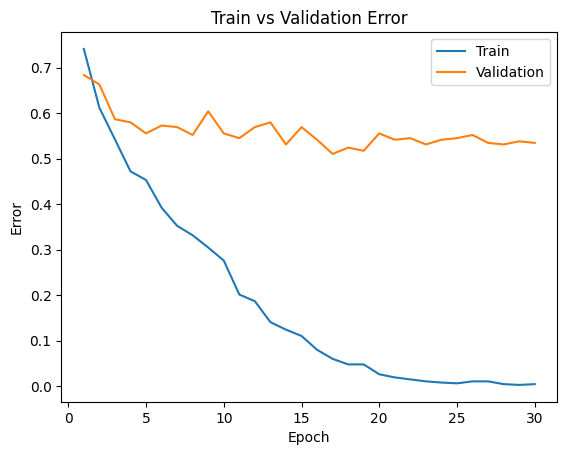

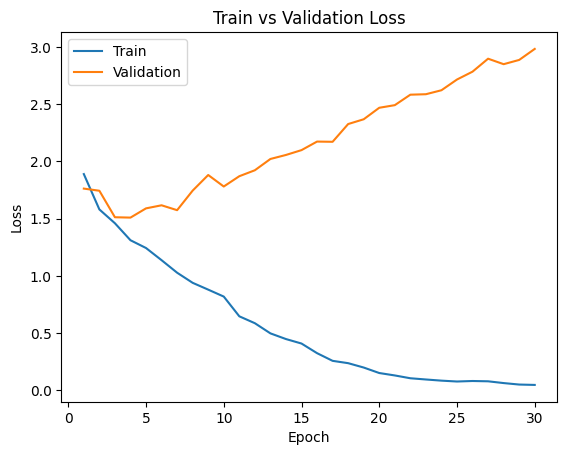

In [ ]:
small_net = SmallNet()

# Set up the learning rate and model parameters
learning_rate = 0.005
batch_size = 64
epochs = 30

train_net(small_net, batch_size=batch_size, learning_rate=learning_rate, num_epochs=epochs)
model_path = get_model_name("small", batch_size=batch_size, learning_rate=learning_rate, epoch=29)

# Plot the training curve for large_net
print("Training curve for small_net:")
plot_training_curve(model_path)

### Part B-4(iii) [1pt EXPLORATORY]
Based on your result from Part(i), suggest another set of hyperparameter values to try.
Justify your choice.

'''

PROVIDE YOUR ANSWER BELOW

'''

I would choose SmallNet, batch_size 256 and learning rate 0.001. Increasing the batch size to 256 will stabilize the gradient updates and reduce the noise, leading to smoother training curves. A larger batch size can also help improve generalization, as it reduces variability in gradient calculations and better approximates the full dataset's gradient. The current learning rate of 0.005 leads to good convergence but shows increasing validation loss after 5, suggesting overfitting. Reducing the learning rate to 0.001 allows finer adjustments to weights during optimization. These changes will likely reduce overfitting.

### Part B-4(iv) [0.5pt EXPLORATORY]

Train the model with the hyperparameters you chose in part(iii), and include the training curve.

Epoch 1: Train err: 0.8542, Train loss: 2.0564 | Validation err: 0.7986, Validation loss: 2.0397
Epoch 2: Train err: 0.7995, Train loss: 2.0299 | Validation err: 0.7951, Validation loss: 2.0023
Epoch 3: Train err: 0.7396, Train loss: 1.9842 | Validation err: 0.7500, Validation loss: 1.9615
Epoch 4: Train err: 0.6970, Train loss: 1.9363 | Validation err: 0.7153, Validation loss: 1.9128
Epoch 5: Train err: 0.6849, Train loss: 1.8786 | Validation err: 0.6944, Validation loss: 1.8570
Epoch 6: Train err: 0.6441, Train loss: 1.8142 | Validation err: 0.6562, Validation loss: 1.7993
Epoch 7: Train err: 0.6198, Train loss: 1.7685 | Validation err: 0.6250, Validation loss: 1.7483
Epoch 8: Train err: 0.6172, Train loss: 1.7128 | Validation err: 0.6285, Validation loss: 1.7142
Epoch 9: Train err: 0.6024, Train loss: 1.6693 | Validation err: 0.6250, Validation loss: 1.6757
Epoch 10: Train err: 0.5998, Train loss: 1.6245 | Validation err: 0.6181, Validation loss: 1.6443
Epoch 11: Train err: 0.5799, 

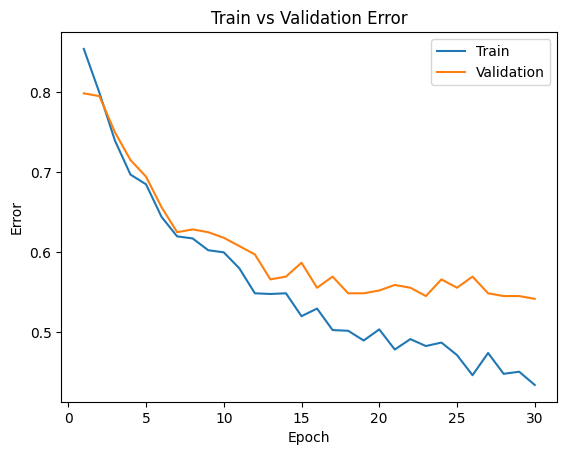

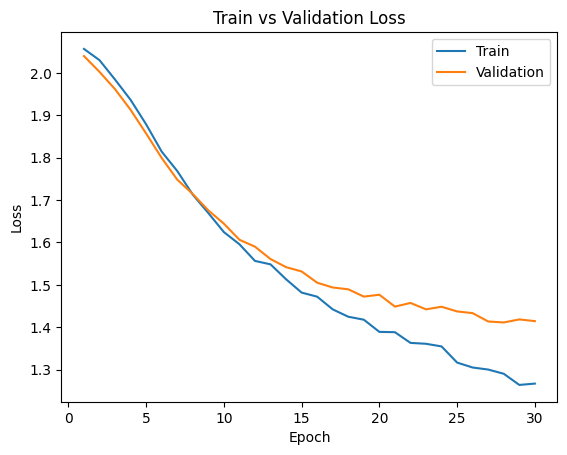

In [ ]:
small_net = SmallNet()

# Set up the learning rate and model parameters
learning_rate = 0.001
batch_size = 256
epochs = 30

train_net(small_net, batch_size=batch_size, learning_rate=learning_rate, num_epochs=epochs)
model_path = get_model_name("small", batch_size=batch_size, learning_rate=learning_rate, epoch=29)

# Plot the training curve for large_net
print("Training curve for small_net:")
plot_training_curve(model_path)

## Part B-5. Evaluating the Best Model


### Part B-5(i) [2pt MODEL]

Summarize in a table the results achieved on training and validation on all your model selections. This includes choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`,
**and the epoch number**. Hint: you can import the Pandas module to create tables.


Then upon reviewing the results choose your **best** model and load the model checkpoint. You can modify the code below to load your chosen set of weights to the model object `net`.

In [ ]:
import pandas as pd

# Initialize a list to store results
results = []

# Define model configurations to test
configurations = [
    {"net": small_net, "batch_size": 64, "learning_rate": 0.01, "epoch": 9},
    {"net": small_net, "batch_size": 64, "learning_rate": 0.01, "epoch": 19},
    {"net": small_net, "batch_size": 64, "learning_rate": 0.01, "epoch": 29},

    {"net": small_net, "batch_size": 64, "learning_rate": 0.005, "epoch": 9},
    {"net": small_net, "batch_size": 64, "learning_rate": 0.005, "epoch": 19},
    {"net": small_net, "batch_size": 64, "learning_rate": 0.005, "epoch": 29},

    {"net": small_net, "batch_size": 256, "learning_rate": 0.001, "epoch": 9},
    {"net": small_net, "batch_size": 256, "learning_rate": 0.001, "epoch": 19},
    {"net": small_net, "batch_size": 256, "learning_rate": 0.001, "epoch": 29},

    {"net": large_net, "batch_size": 64, "learning_rate": 0.01, "epoch": 9},
    {"net": large_net, "batch_size": 64, "learning_rate": 0.01, "epoch": 19},
    {"net": large_net, "batch_size": 64, "learning_rate": 0.01, "epoch": 29},

    {"net": large_net, "batch_size": 64, "learning_rate": 0.1, "epoch": 9},
    {"net": large_net, "batch_size": 64, "learning_rate": 0.1, "epoch": 19},
    {"net": large_net, "batch_size": 64, "learning_rate": 0.1, "epoch": 29},

    {"net": large_net, "batch_size": 64, "learning_rate": 0.001, "epoch": 9},
    {"net": large_net, "batch_size": 64, "learning_rate": 0.001, "epoch": 19},
    {"net": large_net, "batch_size": 64, "learning_rate": 0.001, "epoch": 29},

    {"net": large_net, "batch_size": 16, "learning_rate": 0.01, "epoch": 9},
    {"net": large_net, "batch_size": 16, "learning_rate": 0.01, "epoch": 19},
    {"net": large_net, "batch_size": 16, "learning_rate": 0.01, "epoch": 29},

    {"net": large_net, "batch_size": 512, "learning_rate": 0.01, "epoch": 9},
    {"net": large_net, "batch_size": 512, "learning_rate": 0.01, "epoch": 19},
    {"net": large_net, "batch_size": 512, "learning_rate": 0.01, "epoch": 29},
]

# Loop through each configuration, evaluate, and store results
for config in configurations:
    net = config["net"]
    batch_size = config["batch_size"]
    learning_rate = config["learning_rate"]
    epoch = config["epoch"]

    # Load the model checkpoint
    model_path = get_model_name(net.name, batch_size, learning_rate, epoch = 29)
    train_err_path = f"{model_path}_train_err.csv"
    train_loss_path = f"{model_path}_train_loss.csv"
    val_err_path = f"{model_path}_val_err.csv"
    val_loss_path = f"{model_path}_val_loss.csv"

    # Load results from CSV files
    train_error = np.loadtxt(train_err_path)[epoch]
    train_loss = np.loadtxt(train_loss_path)[epoch]
    val_error = np.loadtxt(val_err_path)[epoch]
    val_loss = np.loadtxt(val_loss_path)[epoch]

    # Append results to the list
    results.append({
        "Network": net.name,
        "Batch Size": batch_size,
        "Learning Rate": learning_rate,
        "Epoch": epoch+1,
        "Training Error": train_error,
        "Training Loss": train_loss,
        "Validation Error": val_error,
        "Validation Loss": val_loss
    })

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Display the table
print("Model Selection Results:")
results_df

Model Selection Results:


,Network,Batch Size,Learning Rate,Epoch,Training Error,Training Loss,Validation Error,Validation Loss
0,small,64,0.010,10,0.123264,0.405331,0.579861,2.338497
1,small,64,0.010,20,0.003472,0.042233,0.586806,3.549832
2,small,64,0.010,30,0.001736,0.016806,0.611111,4.126135
3,small,64,0.005,10,0.276042,0.819679,0.555556,1.781378
4,small,64,0.005,20,0.026042,0.151705,0.555556,2.469370
5,small,64,0.005,30,0.004340,0.047741,0.534722,2.983563
6,small,256,0.001,10,0.599826,1.624494,0.618056,1.644336
7,small,256,0.001,20,0.503472,1.389140,0.552083,1.476719
8,small,256,0.001,30,0.434028,1.267189,0.541667,1.414484
9,large,64,0.010,10,0.500000,1.343479,0.631944,1.661612


In [ ]:
net = SmallNet()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)

<ipython-input-37-1c9a4cb919fa>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


<All keys matched successfully>

### Part B-5(ii) [4pt DISCUSSION]

Justify your choice of model from Part (i).

'''

PROVIDE YOUR ANSWER BELOW

'''

Based on the results, small net, batch size 256, learning rate 0.001, epoch 30 is the best configuration due to its lowest validation loss with 1.41, indicating excellent generalization to unseen data. While its validation error 0.54 is slightly higher than the best-performing configuration, the lower loss suggests that the model predictions are closer to the true labels with higher confidence. The larger batch size 256 stabilizes gradient updates, and the smaller learning rate 0.001 ensures fine-tuned weight adjustments, avoiding overfitting. This combination provides a strong balance between stability, generalization, and efficient training performance.

### Part B-5(iii) [2pt RESULT]

Using the helper code in Part 0, any code from lecture notes, or any code that you write, compute and report the **test classification error** for your chosen model.

In [ ]:
# If you use the `evaluate` function provided in part 0, you will need to
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    data_dir=data_dir,
    batch_size=256)

net = SmallNet()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)
net.eval()

# Define the loss criterion
criterion = nn.CrossEntropyLoss()

# Compute test classification error
test_error, test_loss = evaluate(small_net, test_loader, criterion)
# Report results
print(f"Test Classification Error: {test_error:.4f}")
print(f"Test Loss: {test_loss:.4f}")

<ipython-input-38-9259f37f6472>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


Test Classification Error: 0.4938
Test Loss: 1.3223


### Part B-5(iv) [3pt DISCUSSION]

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

'''

PROVIDE YOUR ANSWER BELOW

'''

The test classification error is slightly lower than the validation error, possibly because the test data distribution is more similar to the training data, and the validation dataset may contain extreme cases. The test classification error is typically higher than the validation error because the test set contains entirely unseen data that the model has not encountered during training or validation, which may contain slightly different data distributions or edge cases. While the model is not trained directly on the validation set, the model may overfit to the validation data through hyperparameter tuning. The test error is an unbiased estimate of the model generalization performance.

### Part B-5(v) [3pt DISCUSSION]
Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

'''

PROVIDE YOUR ANSWER BELOW

'''

We only use the test dataset at the very end because it serves as the final, unbiased evaluation of the model's generalization ability. This is critical for ensuring the reliability and fairness of the performance assessment. If the test set is used multiple times during training, the model or hyperparameters could indirectly "learn" from the test set, resulting overfitting issue. Also, the test set represents unseen data that simulates real-world scenarios, we typically do not know the future data distributions. The test data provides an honest estimate of how the model after tuning performs on completely unseen data.

### Part B-5(vi) [3pt RESULT]
Preprocess the images from the secret test set provided below and classify these images into the 8 class labels from the mechanical tools dataset using your chosen model. Report the model predictions by your chosen model on this test dataset as a csv file called 'labels_part5.csv', containing the name of the images and their corresponsing predicted labels for all the images in the folder.

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=254545a95fb0a52fbb2e7da7aa4963a8dec784d9572e20d6d04c5d3355e24f49
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
import wget
myfile = wget.download('https://github.com/Sabaae/Dataset/blob/main/secret_test.zip')
_ = !unzip "/content/secret_test.zip" -d "/content/secret_test/"

In [ ]:
_ = !unzip "/content/secret_test.zip" -d "/content/secret_test/"

In [ ]:
def get_secret_data_loader(data_dir, batch_size):
    """
    Load the Mechanical Tools Dataset as the test dataset.

    Args:
        data_dir: The root directory of the dataset.
        batch_size: Number of samples per batch.

    Returns:
        test_loader: Iterable DataLoader for testing data.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the dataset (all images in one folder)
    dataset = datasets.ImageFolder(data_dir, transform=transform)

    # Create DataLoader for the entire dataset
    test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return test_loader

In [ ]:
import shutil

macosx_dir = "/content/secret_test/__MACOSX"
if os.path.exists(macosx_dir):
    shutil.rmtree(macosx_dir)  # Recursively delete the __MACOSX folder


# Load the Mechanical Tools Dataset
data_dir = "/content/secret_test/"
batch_size = 1  # One image per batch for visualization

# Use the get_data_loader function to load the dataset
test_loader = get_secret_data_loader(
    data_dir=data_dir, batch_size=batch_size
)

In [ ]:
import csv
import torch
import os

# Define class names manually
classes = ["Gasoline_Can", "Hammer", "Pebbles", "Pliers",
           "Rope", "Screw_Driver", "Toolbox", "Wrench"]

# Load the model
net = SmallNet()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)
net.eval()  # Set the model to evaluation mode

# Collect filenames from the dataset
image_paths = [path for path, _ in test_loader.dataset.samples]  # Get image file paths

# Prepare to store predictions
predictions = []

# Predict labels for the test dataset
with torch.no_grad():  # Disable gradient calculation
    for batch_idx, (inputs, _) in enumerate(test_loader):
        outputs = net(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the predicted class index

        # Match filenames correctly to batch size
        batch_start = batch_idx * test_loader.batch_size
        batch_filenames = image_paths[batch_start: batch_start + len(inputs)]

        # Map predicted indices to class names
        for filename, pred_label in zip(batch_filenames, predicted):
            class_name = classes[pred_label.item()]  # Map index to class name
            predictions.append([os.path.basename(filename), class_name])  # Save filename and class name

# Save predictions to a CSV file
output_file = "labels_part5.csv"
with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image Name", "Predicted Label"])  # Write the header
    writer.writerows(predictions)  # Write predictions

print(f"Predictions saved to {output_file}")

<ipython-input-48-bf7bb10637d4>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


Predictions saved to labels_part5.csv


## Part B-6. Fully-Connected Linear ANN vs CNN [4pt RESULT]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.


Similar to what you did in the previous part, report the model predictions by your best ANN architecture on the secret test dataset as a csv file called 'labels_part6.csv', containing the names of the images and their corresopnding predicted labels for all the images in the folder.


How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying mechanical tools images?


In [ ]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(128*128*3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 8)

    def forward(self, x):
        x = x.view(-1, 128*128*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Training with batch_size=64, learning_rate=0.01, num_epochs=30
Epoch 1: Train err: 0.7318, Train loss: 1.8946 | Validation err: 0.7153, Validation loss: 1.8098
Epoch 2: Train err: 0.6337, Train loss: 1.6105 | Validation err: 0.7118, Validation loss: 1.7896
Epoch 3: Train err: 0.5894, Train loss: 1.4767 | Validation err: 0.6424, Validation loss: 1.6629
Epoch 4: Train err: 0.5165, Train loss: 1.3371 | Validation err: 0.6215, Validation loss: 1.6349
Epoch 5: Train err: 0.4722, Train loss: 1.2598 | Validation err: 0.6319, Validation loss: 1.8697
Epoch 6: Train err: 0.4722, Train loss: 1.2608 | Validation err: 0.6389, Validation loss: 1.7524
Epoch 7: Train err: 0.4019, Train loss: 1.1361 | Validation err: 0.6493, Validation loss: 1.7902
Epoch 8: Train err: 0.3837, Train loss: 1.1027 | Validation err: 0.5903, Validation loss: 1.8315
Epoch 9: Train err: 0.4210, Train loss: 1.1242 | Validation err: 0.6319, Validation loss: 1.9307
Epoch 10: Train err: 0.3550, Train loss: 0.9881 | Validation er

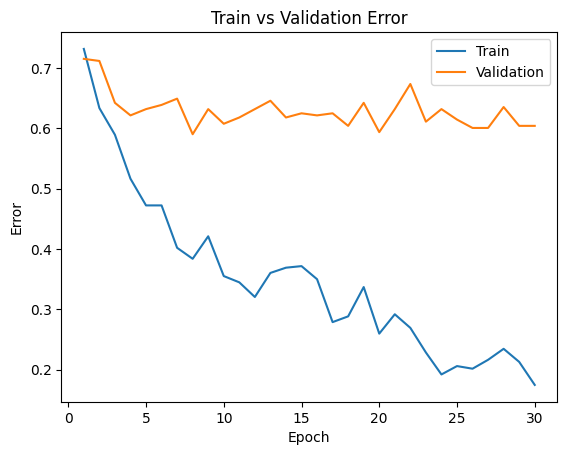

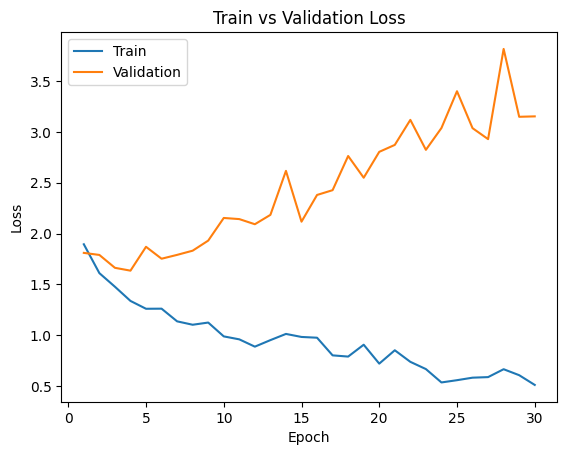

Training curve for model_simple_bs32_lr0.005_epoch49:


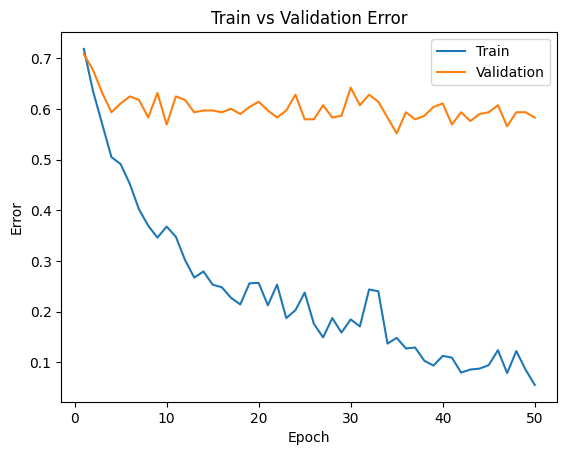

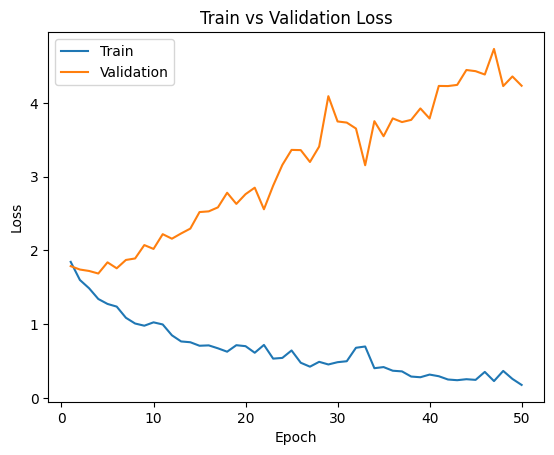

Training curve for model_simple_bs128_lr0.001_epoch39:


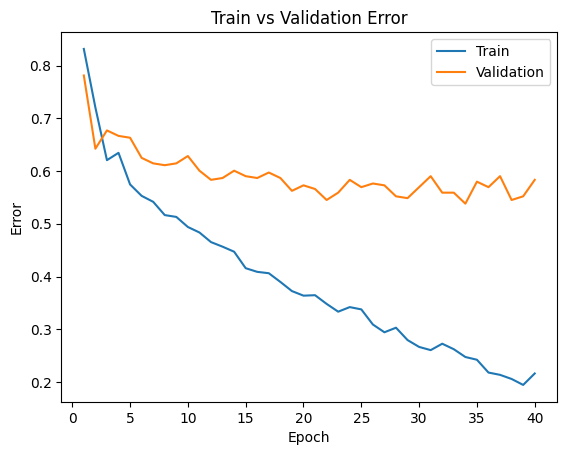

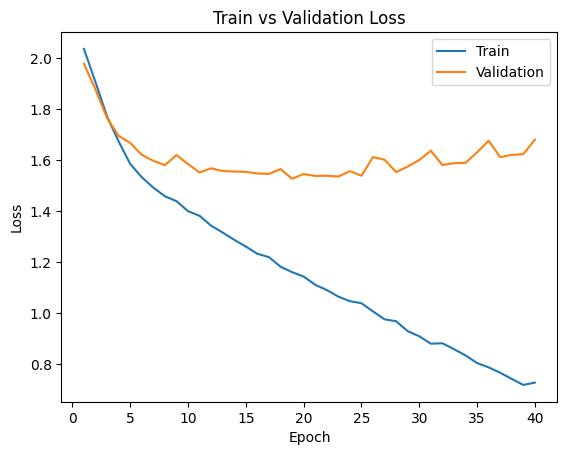

In [ ]:
# Define three sets of hyperparameters
hyperparams = [
    {"batch_size": 64, "learning_rate": 0.01, "num_epochs": 30},
    {"batch_size": 32, "learning_rate": 0.005, "num_epochs": 50},
    {"batch_size": 128, "learning_rate": 0.001, "num_epochs": 40}
]

# Train models with different hyperparameters and save paths
model_paths = []

for params in hyperparams:
    print(f"\nTraining with batch_size={params['batch_size']}, learning_rate={params['learning_rate']}, num_epochs={params['num_epochs']}")

    # Initialize the model
    net = simpleANN()

    # Train the model
    train_net(net, batch_size=params["batch_size"], learning_rate=params["learning_rate"], num_epochs=params["num_epochs"])

    # Save model path
    model_path = get_model_name(net.name, params["batch_size"], params["learning_rate"], params["num_epochs"]-1)
    model_paths.append(model_path)

    print(f"Model saved at: {model_path}")

# Plot training curves for all models
print("\nPlotting training curves for all hyperparameter settings:")
for model_path in model_paths:
    print(f"Training curve for {model_path}:")
    plot_training_curve(model_path)


In [ ]:
net = simpleANN()
model_path = get_model_name(net.name, batch_size=128, learning_rate=0.001, epoch=39)
state = torch.load(model_path)
net.load_state_dict(state)
net.eval()

# Define the loss criterion
criterion = nn.CrossEntropyLoss()

# Compute test classification error
test_error, test_loss = evaluate(net, test_loader, criterion)
# Report results
print(f"Test Classification Error: {test_error:.4f}")
print(f"Test Loss: {test_loss:.4f}")

<ipython-input-51-a3d6555b5b4f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


Test Classification Error: 0.8391
Test Loss: 4.0617


'''

PROVIDE YOUR ANSWER BELOW

'''

The best CNN model did much better than the 2-layer linear ANN, with a test classification error of 49% compared to 84% for the ANN. This shows that CNNs are better at handling image data because they can pick up patterns like edges and shapes, while the ANN just flattens the image and loses important spatial information. The high error and loss for the ANN suggest it struggled to generalize and likely overfitted to the training data. Overall, the CNN was a much better choice for classifying mechanical tools since it’s designed to work with images.

In [ ]:
net = simpleANN()
model_path = get_model_name(net.name, batch_size=128, learning_rate=0.001, epoch=39)
state = torch.load(model_path)
net.load_state_dict(state)
net.eval()

# Collect filenames from the dataset
image_paths = [path for path, _ in test_loader.dataset.samples]  # Get image file paths

# Prepare to store predictions
predictions = []

# Predict labels for the test dataset
with torch.no_grad():  # Disable gradient calculation
    for batch_idx, (inputs, _) in enumerate(test_loader):
        outputs = net(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the predicted class index

        # Match filenames correctly to batch size
        batch_start = batch_idx * test_loader.batch_size
        batch_filenames = image_paths[batch_start: batch_start + len(inputs)]

        for filename, pred_label in zip(batch_filenames, predicted):
            predictions.append([os.path.basename(filename), classes[pred_label.item()]])

# Save predictions to a CSV file
output_file = "labels_part6.csv"
with open(output_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image Name", "Predicted Label"])  # Write the header
    writer.writerows(predictions)  # Write predictions

print(f"Predictions saved to {output_file}")

<ipython-input-52-dd35b01d76cf>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


Predictions saved to labels_part6.csv


# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to perform a deeper exploration of the assignment.

In part A we constructed and trained a 2-layer neural network from scratch. In Part B we saw how PyTorch can be used to simplify the construction of neural networks by taking care of all the complexity related to gradient calculations, training on GPUs, and structuring your code.

For this bonus challenge we will propose additional task that will have you work towards completing the pipeline and deploying the models online, while exploring ways to improve these models along the way.

Tasks:

1. Modify your code to classify images that are not "Rope" or "Hammer" into the category "other".
2. Preprocess images from the internet to be able to classify any images into mechanical tools lables such as gasoline_can, hammer, etc. (i.e., resize, aspect ratio, etc.). Evaluate your best model's performance on images loaded from the internet.
3. Deploy your best model onto huggingface spaces (or other web hosting services) to classify images into the different mechanical tools classes.

Bonus marks will be provided based on the number of tasks completed and how well they are completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.

Task 1:


In [ ]:
from torchvision.datasets import DatasetFolder
from torchvision import transforms, datasets
from torch.utils.data import random_split, DataLoader
import torch
import numpy as np

###############################################################################
# Data Loading

def get_data_loader(data_dir, batch_size, valid_split=0.2):
    """
    Load the Mechanical Tools Dataset, group non-"Rope" and non-"Hammer" images
    into the "other" category, and split into training, validation, and testing.

    Args:
        data_dir: The root directory of the dataset, with subdirectories for each class.
        batch_size: Number of samples per batch.
        valid_split: Fraction of the training data to be used for validation.

    Returns:
        train_loader: Iterable DataLoader for training data.
        val_loader: Iterable DataLoader for validation data.
        test_loader: Iterable DataLoader for testing data.
        classes: List of class names.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the full dataset
    original_dataset = datasets.ImageFolder(data_dir, transform=transform)

    # Map the original labels into "Rope," "Hammer," and "other"
    label_mapping = {"Rope": 0, "Hammer": 1}  # Map specific labels
    other_label = 2  # Assign the index 2 for "other"
    new_classes = ["Rope", "Hammer", "Other"]

    def relabel_samples(sample):
        image, label = sample
        class_name = original_dataset.classes[label]
        if class_name in label_mapping:
            new_label = label_mapping[class_name]
        else:
            new_label = other_label  # Map all other classes to "other"
        return image, new_label

    # Relabel dataset dynamically
    relabeled_dataset = [(relabel_samples(sample)) for sample in original_dataset]

    # Split the dataset
    total_size = len(relabeled_dataset)
    test_size = int(0.1 * total_size)  # 10% for testing
    valid_size = int(valid_split * (total_size - test_size))  # Validation from remaining
    train_size = total_size - test_size - valid_size

    # Create custom datasets for train/val/test splits
    train_dataset, val_dataset, test_dataset = random_split(relabeled_dataset, [train_size, valid_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader, new_classes


In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on an 3-class classification problem
    target_classes = ["Rope", "Hammer", "Other"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible results
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            data_dir='/content/mechanical_tools/mechanical_tools', # Ensure this is where your dataset is stored
            batch_size=batch_size)

    # Make sure the classes are as expected
    assert len(classes) == 3, "The dataset should have exactly 3 classes."
    ########################################################################
    # Define the Loss function and optimizer
    # Use CrossEntropyLoss for multi-class classification
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)  # No need to normalize labels here for CrossEntropyLoss
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total_train_err += (predicted != labels).sum().item()  # Count errors
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # Calculate error and loss for the training and validation set
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        # Print stats for the current epoch
        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Write the train/test loss/error into CSV files for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)

In [ ]:
net = SmallNet()
train_net(net, batch_size=256, learning_rate=0.001, num_epochs=30)

Epoch 1: Train err: 0.6059, Train loss: 1.9844 | Validation err: 0.2396, Validation loss: 1.7732
Epoch 2: Train err: 0.2578, Train loss: 1.5992 | Validation err: 0.2361, Validation loss: 1.2309
Epoch 3: Train err: 0.2561, Train loss: 1.1114 | Validation err: 0.2361, Validation loss: 0.8565
Epoch 4: Train err: 0.2561, Train loss: 0.9375 | Validation err: 0.2361, Validation loss: 0.8228
Epoch 5: Train err: 0.2561, Train loss: 0.8610 | Validation err: 0.2361, Validation loss: 0.7155
Epoch 6: Train err: 0.2925, Train loss: 0.7770 | Validation err: 0.3229, Validation loss: 0.7797
Epoch 7: Train err: 0.2917, Train loss: 0.7646 | Validation err: 0.2361, Validation loss: 0.6649
Epoch 8: Train err: 0.2561, Train loss: 0.7484 | Validation err: 0.2361, Validation loss: 0.6561
Epoch 9: Train err: 0.2561, Train loss: 0.7111 | Validation err: 0.2361, Validation loss: 0.6626
Epoch 10: Train err: 0.2700, Train loss: 0.7064 | Validation err: 0.2361, Validation loss: 0.6621
Epoch 11: Train err: 0.2569, 

In [ ]:
net = SmallNet()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=29)
state = torch.load(model_path)
net.load_state_dict(state)
small_net.eval()

# Define the loss criterion
criterion = nn.CrossEntropyLoss()

# Compute test classification error
test_error, test_loss = evaluate(small_net, test_loader, criterion)
# Report results
print(f"Test Classification Error: {test_error:.4f}")
print(f"Test Loss: {test_loss:.4f}")

<ipython-input-75-230dd6a89e11>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


Test Classification Error: 0.8652
Test Loss: 3.8360


Task 2:

In [ ]:
from PIL import Image
import requests
from io import BytesIO
from torchvision import transforms

def load_and_preprocess_image(url):
    """
    Load an image from a URL and preprocess it for classification.

    Preprocessing includes:
    - Resizing (with aspect ratio preserved).
    - Cropping/padding to 128x128.
    - Normalizing values.
    - Converting to a PyTorch tensor.

    Args:
        url (str): URL of the image.

    Returns:
        img_tensor (torch.Tensor): Preprocessed image tensor.
    """
    # Step 1: Load the image from the URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")  # Ensure RGB format

    # Step 2: Define the preprocessing pipeline
    transform = transforms.Compose([
        transforms.Resize(128),                      # Resize to 128 (shortest side)
        transforms.CenterCrop((128, 128)),           # Crop to 128x128
        transforms.ToTensor(),                       # Convert to Tensor
        transforms.Normalize((0.5, 0.5, 0.5),       # Normalize (mean=0.5, std=0.5 for RGB channels)
                             (0.5, 0.5, 0.5))
    ])

    # Step 3: Apply the preprocessing
    img_tensor = transform(img)

    return img_tensor


In [ ]:
image_urls = [
    "https://img.freepik.com/free-vector/sticker-design-with-claw-hammer-isolated_1308-61820.jpg",
    "https://m.media-amazon.com/images/I/71JxuOqyiYL.jpg",
    "https://m.media-amazon.com/images/I/61YPfGIHOgL._AC_UF1000,1000_QL80_.jpg",
    "https://m.media-amazon.com/images/I/61ZMF8ub8GL.jpg",
    "https://m.media-amazon.com/images/I/61CVy5mOh8L.jpg"
]

preprocessed_images = [load_and_preprocess_image(url) for url in image_urls]

# Example: Check the shape of the first preprocessed image
print(preprocessed_images[0].shape)  # torch.Size([3, 128, 128])

torch.Size([3, 128, 128])


In [ ]:
import matplotlib.pyplot as plt
import torch

def denormalize_image(tensor):
    """
    Undo normalization to convert the tensor back to a displayable image.

    Args:
        tensor (torch.Tensor): Normalized image tensor (C, H, W).

    Returns:
        image (numpy array): Denormalized image array (H, W, C).
    """
    # Denormalize: Undo normalization (mean=0.5, std=0.5)
    image = tensor.clone()  # Clone to avoid modifying the original tensor
    image = image * 0.5 + 0.5  # Reverse normalization
    image = image.permute(1, 2, 0).numpy()  # Convert to (H, W, C) format
    return image

def predict_and_visualize(model, preprocessed_images, classes):
    """
    Predict classes for preprocessed images and display the images with predictions.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        preprocessed_images (list): List of preprocessed image tensors.
        classes (list): List of class names.
    """
    model.eval()  # Set the model to evaluation mode

    for img_tensor in preprocessed_images:
        # Make a prediction
        with torch.no_grad():
            outputs = model(img_tensor.unsqueeze(0))  # Add batch dimension
            _, predicted = torch.max(outputs, 1)  # Get the index of the highest score
            predicted_class = classes[predicted.item()]

        # Denormalize the image for display
        img_to_display = denormalize_image(img_tensor)

        # Display the image with the predicted class
        plt.imshow(img_to_display)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()


In [ ]:
# previously classification task for 8 classes
def get_data_loader(data_dir, batch_size, valid_split=0.2):
    """
    Load the Mechanical Tools Dataset, split into training, validation, and testing.

    Args:
        data_dir: The root directory of the dataset, with subdirectories for each class.
        batch_size: Number of samples per batch.
        valid_split: Fraction of the training data to be used for validation.

    Returns:
        train_loader: Iterable DataLoader for training data.
        val_loader: Iterable DataLoader for validation data.
        test_loader: Iterable DataLoader for testing data.
        classes: List of class names.
    """
    # Define transformations
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to 128x128
        transforms.ToTensor(),         # Convert to Tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    # Load the full dataset
    dataset = datasets.ImageFolder(data_dir, transform=transform)
    classes = dataset.classes  # Get class names

    # Split the dataset
    total_size = len(dataset)
    test_size = int(0.1 * total_size)  # 10% for testing
    valid_size = int(valid_split * (total_size - test_size))  # Valid from remaining
    train_size = total_size - test_size - valid_size

    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loader, val_loader, test_loader, classes

def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on an 8-class classification problem
    target_classes = ["Gasoline_Can", "Hammer", "Pebbels", "pliers",
                      "Rope", "Screw_Driver", "Toolbox", "Wrench"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible results
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            data_dir='/content/mechanical_tools/mechanical_tools', # Ensure this is where your dataset is stored
            batch_size=batch_size)

    # Make sure the classes are as expected
    assert len(classes) == 8, "The dataset should have exactly 8 classes."
    ########################################################################
    # Define the Loss function and optimizer
    # Use CrossEntropyLoss for multi-class classification
    criterion = nn.CrossEntropyLoss()  # Change to CrossEntropyLoss for multi-class
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/accuracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # Loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)  # No need to normalize labels here for CrossEntropyLoss
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total_train_err += (predicted != labels).sum().item()  # Count errors
            total_train_loss += loss.item()
            total_epoch += len(labels)

        # Calculate error and loss for the training and validation set
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        # Print stats for the current epoch
        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]:.4f}, Train loss: {train_loss[epoch]:.4f} | "
              f"Validation err: {val_err[epoch]:.4f}, Validation loss: {val_loss[epoch]:.4f}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Total time elapsed: {elapsed_time:.2f} seconds")

    # Write the train/test loss/error into CSV files for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)


Epoch 1: Train err: 0.8872, Train loss: 2.0542 | Validation err: 0.8681, Validation loss: 2.0460
Epoch 2: Train err: 0.8524, Train loss: 2.0138 | Validation err: 0.8333, Validation loss: 2.0119
Epoch 3: Train err: 0.7795, Train loss: 1.9534 | Validation err: 0.8021, Validation loss: 1.9621
Epoch 4: Train err: 0.7188, Train loss: 1.8938 | Validation err: 0.7326, Validation loss: 1.8940
Epoch 5: Train err: 0.6840, Train loss: 1.8339 | Validation err: 0.7049, Validation loss: 1.8459
Epoch 6: Train err: 0.6536, Train loss: 1.7691 | Validation err: 0.6944, Validation loss: 1.7994
Epoch 7: Train err: 0.6128, Train loss: 1.7194 | Validation err: 0.6597, Validation loss: 1.7533
Epoch 8: Train err: 0.6337, Train loss: 1.6774 | Validation err: 0.6215, Validation loss: 1.7175
Epoch 9: Train err: 0.5894, Train loss: 1.6460 | Validation err: 0.6458, Validation loss: 1.6811
Epoch 10: Train err: 0.5877, Train loss: 1.6025 | Validation err: 0.6354, Validation loss: 1.6674
Epoch 11: Train err: 0.5885, 

<ipython-input-85-57ce87071260>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))


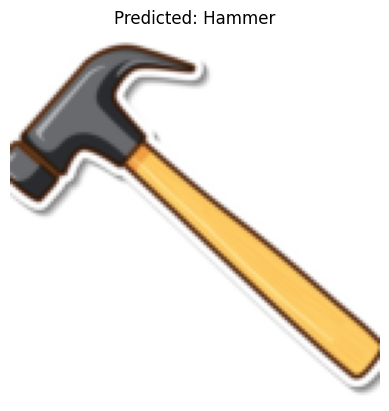

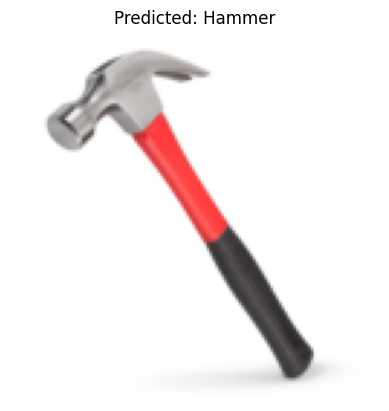

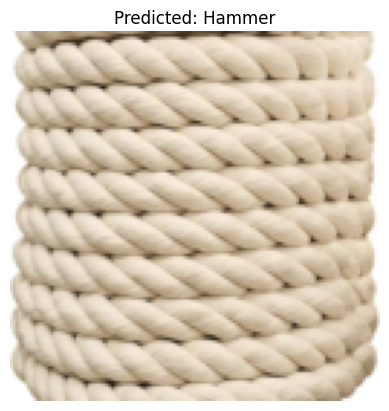

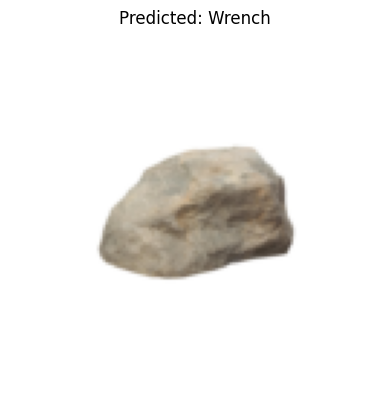

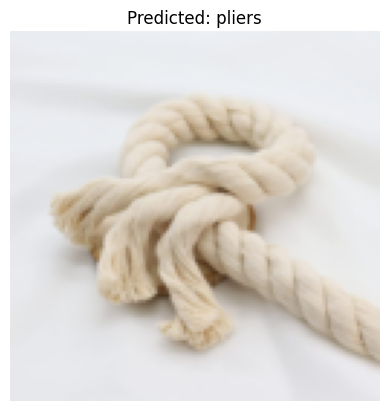

In [ ]:
net = SmallNet()
train_net(net, batch_size=256, learning_rate=0.001, num_epochs=30)
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=29)
net.load_state_dict(torch.load(model_path))
classes = ["Gasoline_Can", "Hammer", "Pebbels", "pliers",
                      "Rope", "Screw_Driver", "Toolbox", "Wrench"]
predict_and_visualize(net, preprocessed_images, classes)

'''

PROVIDE YOUR ANSWER BELOW

'''

Part 3:

link: https://huggingface.co/spaces/serenazheng/mechanical_tools_classification

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
#jupyter nbconvert --to html A1.ipynb

(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **5 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**